In [57]:
import library
from matplotlib import pyplot as plt
import pandas as pd
from math import pi

In [53]:
data = library.loadList('exoplanet.csv')

col = {'m':2,'rad':3,'sma':5,'temp':11}

In [100]:
def getDensity(mass,radius):
    mass = float(mass)
    radius = float(radius)
    mass *= 1.898*(10**30)
    radius *= 6991100000
    density = mass / (4/3*(pi*radius**3))
    cleanDensity = round(density,2)
    return cleanDensity

def getColor(density):
    if density < 1:
        color = 'yellow'
    elif density >= 1 and density < 4:
        color = 'blue'
    elif density >= 4 and density < 6:
        color = 'red'
    else:
        color = 'black'
    return color

masterList = []
for n in range(len(data)):
    sma = data[n][col['sma']]
    temperature = data[n][col['temp']]
    mass = data[n][col['m']]
    radius = data[n][col['rad']]
    if mass != '' and radius != '':
        density = getDensity(mass,radius)
        color = getColor(density)
    if sma != '' and float(sma) <= 5000 and temperature != '':
        sma = float(sma)
        temperature = float(temperature)
        masterList += [[round(sma,2), round(temperature,2),round(density,2),color]]

print('[SEMI-MAJOR AXIS (AU), TEMPERATURE (KELVINS), DENSITY (extra), COLOR FOR PLOT (based on density)]:')
masterList.sort()
print(masterList)

[SEMI-MAJOR AXIS (AU), TEMPERATURE (KELVINS), DENSITY (extra), COLOR FOR PLOT (based on density)]:
[[0.01, 400.0, 0.5, 'yellow'], [0.01, 604.0, 1.61, 'blue'], [0.01, 6319.1, 5.87, 'red'], [0.01, 7112.0, 5.9, 'red'], [0.02, 342.0, 0.5, 'yellow'], [0.02, 813.5, 5.37, 'red'], [0.02, 1179.7, 2.2, 'blue'], [0.02, 1317.6, 2.43, 'blue'], [0.02, 1389.0, 1.12, 'blue'], [0.02, 1390.3, 1.0, 'blue'], [0.02, 1516.6, 1.24, 'blue'], [0.02, 1577.0, 1.12, 'blue'], [0.02, 1666.1, 5.93, 'red'], [0.02, 1669.2, 1.2, 'blue'], [0.02, 1710.4, 0.59, 'yellow'], [0.02, 1873.6, 1.08, 'blue'], [0.02, 1911.5, 0.58, 'yellow'], [0.02, 1915.3, 0.47, 'yellow'], [0.02, 2000.0, 0.59, 'yellow'], [0.02, 2169.0, 5.78, 'red'], [0.02, 2187.5, 8.75, 'black'], [0.02, 2319.7, 0.36, 'yellow'], [0.02, 2508.0, 0.47, 'yellow'], [0.03, 500.8, 2.43, 'blue'], [0.03, 565.4, 0.33, 'yellow'], [0.03, 600.0, 0.85, 'yellow'], [0.03, 650.3, 1.8, 'blue'], [0.03, 774.0, 0.76, 'yellow'], [0.03, 1099.7, 1.02, 'blue'], [0.03, 1170.7, 0.87, 'yellow

In [101]:
df = pd.DataFrame(masterList,columns=['SemiMajorAxis','Temperature','Density','PlotColor'])
df

,SemiMajorAxis,Temperature,Density,PlotColor
0,0.01,400.0,0.50,yellow
1,0.01,604.0,1.61,blue
2,0.01,6319.1,5.87,red
3,0.01,7112.0,5.90,red
4,0.02,342.0,0.50,yellow
...,...,...,...,...
700,26.97,1200.0,6.97,black
701,42.81,1200.0,9.28,black
702,53.00,1028.0,0.11,yellow
703,67.96,1100.0,19.33,black


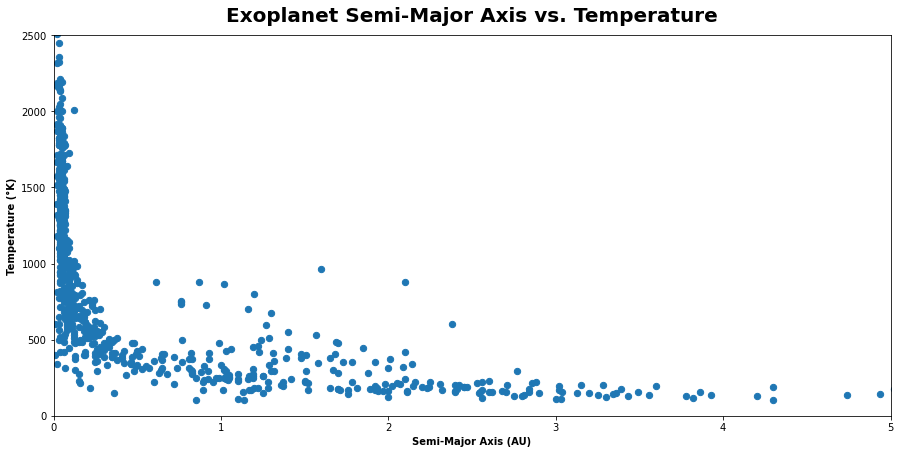

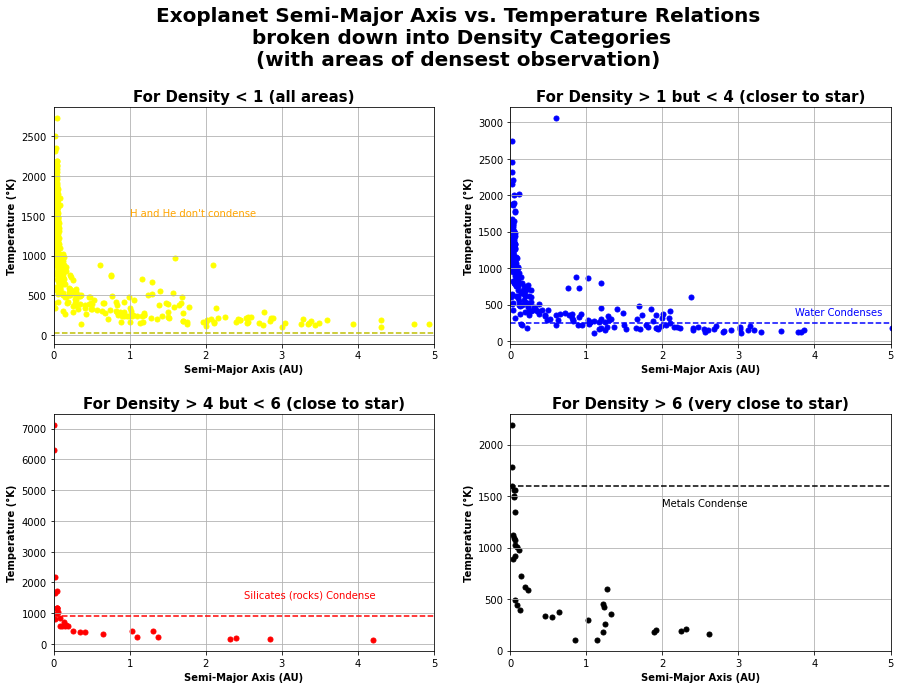

In [177]:
plt.figure(figsize=(15,7))
sma = df.SemiMajorAxis
temp = df.Temperature
plt.scatter(sma,temp,s=40)
plt.title('Exoplanet Semi-Major Axis vs. Temperature',fontweight='bold',fontsize=20,y=1.02)
plt.xlabel('Semi-Major Axis (AU)',fontweight='bold')
plt.xlim(0,5)
plt.ylabel('Temperature (°K)',fontweight='bold')
plt.ylim(0,2500)
plt.show()

plt.figure(figsize=(15,10))

smaList = []
tempList = []
for i in range(len(masterList)):
    if masterList[i][3] == 'yellow':
        smaList.append(masterList[i][0])
        tempList.append(masterList[i][1])

plt.subplot(221)
plt.scatter(smaList,tempList,s=25,c='yellow')
plt.title('For Density < 1 (all areas)',fontweight='bold',fontsize=15)
plt.xlabel('Semi-Major Axis (AU)',fontweight='bold')
plt.xlim(0,5)
plt.ylabel('Temperature (°K)',fontweight='bold')
plt.grid(True)
plt.hlines(y=30,xmin=0,xmax=5,color='y',linestyle='dashed')
plt.annotate("H and He don't condense", xy=(1,820), xytext=(1,1500),color='orange')

smaList = []
tempList = []
for i in range(len(masterList)):
    if masterList[i][3] == 'blue':
        smaList.append(masterList[i][0])
        tempList.append(masterList[i][1])

plt.subplot(222)
plt.scatter(smaList,tempList,s=25,c='blue')
plt.title('For Density > 1 but < 4 (closer to star)',fontweight='bold',fontsize=15)
plt.xlabel('Semi-Major Axis (AU)',fontweight='bold')
plt.xlim(0,5)
plt.ylabel('Temperature (°K)',fontweight='bold')
plt.grid(True)
plt.hlines(y=250,xmin=0,xmax=5,color='b',linestyle='dashed')
plt.annotate("Water Condenses", xy=(4,1000), xytext=(3.75,350), color='blue')

smaList = []
tempList = []
for i in range(len(masterList)):
    if masterList[i][3] == 'red':
        smaList.append(masterList[i][0])
        tempList.append(masterList[i][1])

plt.subplot(223)
plt.scatter(smaList,tempList,s=25,c='red')
plt.title('For Density > 4 but < 6 (close to star)',fontweight='bold',fontsize=15)
plt.xlabel('Semi-Major Axis (AU)',fontweight='bold')
plt.xlim(0,5)
plt.ylabel('Temperature (°K)',fontweight='bold')
plt.grid(True)
plt.hlines(y=900,xmin=0,xmax=5,color='r',linestyle='dashed')
plt.annotate("Silicates (rocks) Condense", xy=(2,1000), xytext=(2.5,1500), color='red')

smaList = []
tempList = []
for i in range(len(masterList)):
    if masterList[i][3] == 'black':
        smaList.append(masterList[i][0])
        tempList.append(masterList[i][1])

plt.subplot(224)
plt.scatter(smaList,tempList,s=25,c='black')
plt.title('For Density > 6 (very close to star)',fontweight='bold',fontsize=15)
plt.xlabel('Semi-Major Axis (AU)',fontweight='bold')
plt.xlim(0,5)
plt.ylabel('Temperature (°K)',fontweight='bold')
plt.grid(True)
plt.hlines(y=1600,xmin=0,xmax=5,color='k',linestyle='dashed')
plt.annotate("Metals Condense", xy=(1,1000), xytext=(2,1400), color='black')

plt.suptitle('Exoplanet Semi-Major Axis vs. Temperature Relations\n broken down into Density Categories\n(with areas of densest observation)',
               fontweight='bold',fontsize=20,y=1.02)
plt.subplots_adjust(hspace=0.3)
plt.show()